In [1]:
import keras
import keras.layers as layers
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.callbacks import TensorBoard
from time import time
from skimage.transform import resize

from tensorflow.keras.optimizers import SGD, Adam

from glob import glob
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread, imsave, imshow, imread_collection
from sklearn.model_selection import train_test_split

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout

import tensorflow as tf

import pathlib
from glob import glob


In [2]:
batch_size = 32
img_size = 512

In [3]:
data_dir = pathlib.Path("Dataset/BID Sample Dataset/")

image_count = list(data_dir.glob('*/*.jpg'))
# str(image_count).count("CPF")


In [4]:
images_cnh_aberta = list()
images_cnh_frente = list()
images_cnh_verso = list()
images_cpf_frente = list()
images_cpf_verso = list()
images_rg_aberto = list()
images_rg_frente = list()
images_rg_verso = list()
for img in image_count:
    if str(img).count("CNH_Aberta"):
        images_cnh_aberta.append(str(img))
    elif str(img).count("CNH_Frente"):
        images_cnh_frente.append(str(img))
    elif str(img).count("CNH_Verso"):
        images_cnh_verso.append(str(img))
    elif str(img).count("CPF_Frente"):
        images_cpf_frente.append(str(img))
    elif str(img).count("CPF_Verso"):
        images_cpf_verso.append(str(img))
    elif str(img).count("RG_Aberto"):
        images_rg_aberto.append(str(img))
    elif str(img).count("RG_Frente"):
        images_rg_frente.append(str(img))
    elif str(img).count("RG_Verso"):
        images_rg_verso.append(str(img))
    else:
        print(img)
        print("Algo deu Errado!")
        break


In [5]:
print(len(images_cnh_aberta))
print(len(images_cnh_frente))
print(len(images_cnh_verso))
print(len(images_cpf_frente))
print(len(images_cpf_verso))
print(len(images_rg_aberto))
print(len(images_rg_frente))
print(len(images_rg_verso))

images = imread_collection(images_cnh_aberta +
                           images_cnh_frente +
                           images_cnh_verso +
                           images_cpf_frente +
                           images_cpf_verso +
                           images_rg_aberto +
                           images_rg_frente +
                           images_rg_verso)


34
36
36
36
36
36
36
36


In [6]:
new_collection_images = list()

for x in range(len(images)):
    new_collection_images.append(resize(
        images[x], (img_size, img_size), anti_aliasing=True))


Text(0.5, 1.0, 'Exemplo de RG')

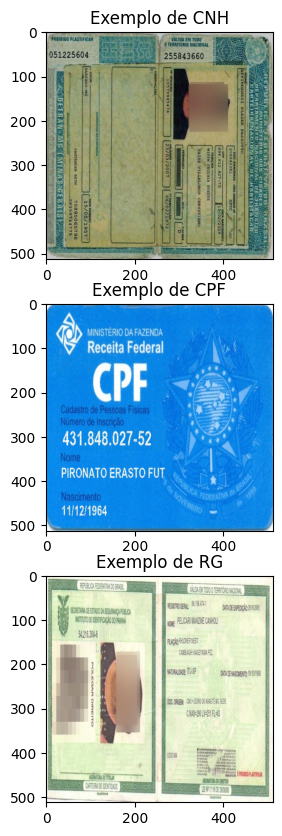

In [7]:
fig, ax = plt.subplots(3, 1, figsize=(10, 10))
ax[0].imshow(new_collection_images[0])
ax[0].set_title('Exemplo de CNH')
ax[1].imshow(new_collection_images[110])
ax[1].set_title('Exemplo de CPF')
ax[2].imshow(new_collection_images[180])
ax[2].set_title('Exemplo de RG')


In [8]:
labels = np.concatenate((np.zeros(len(images_cnh_aberta)), np.ones(
    len(images_cnh_frente)), np.ones(len(images_cnh_verso)) + 1, np.ones(len(images_cpf_frente)) + 2, np.ones(len(images_cpf_frente)) + 3,
    np.ones(len(images_cpf_frente)) + 4, np.ones(len(images_cpf_frente)) + 5, np.ones(len(images_cpf_frente)) + 6))
labels


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 6., 6., 6., 6., 6., 6., 6.,
       6., 6., 6., 6., 6.

In [9]:
labels = to_categorical(labels, num_classes=8)
labels


array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

## Etapa 07 - CNN

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(
    np.array(new_collection_images), labels, test_size=0.3)

print('Tamanho do Treino: ', X_train.shape)
print('Tamanho do Teste: ', X_test.shape)


Tamanho do Treino:  (200, 512, 512, 3)
Tamanho do Teste:  (86, 512, 512, 3)


In [52]:
# Lenet5

def build_lenet5(image_size, channel_size, output):
    # Definir modelo LeNet-5
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(image_size, image_size, channel_size)),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(filters=16, kernel_size=(5, 5), activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(units=120, activation='relu'),
        tf.keras.layers.Dense(units=84, activation='relu'),
        tf.keras.layers.Dense(units=output, activation='softmax')
    ])

    # Compilar o modelo
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Imprimir o resumo do modelo
    model.summary()

    return model


In [53]:
model = build_lenet5(img_size, 3, 8)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 508, 508, 6)       456       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 254, 254, 6)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 250, 250, 16)      2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 125, 125, 16)      0         
_________________________________________________________________
flatten (Flatten)            (None, 250000)            0         
_________________________________________________________________
dense (Dense)                (None, 120)               30000120  
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [54]:
epochs = 10

model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, Y_test))

Epoch 1/10
7/7 [==============================] - 26s 1s/step - loss: 13.0439 - accuracy: 0.1650 - val_loss: 5.0036 - val_accuracy: 0.1279
Epoch 2/10
7/7 [==============================] - 2s 387ms/step - loss: 3.0800 - accuracy: 0.2400 - val_loss: 1.9696 - val_accuracy: 0.2326
Epoch 3/10
7/7 [==============================] - 3s 391ms/step - loss: 1.4855 - accuracy: 0.4400 - val_loss: 1.7413 - val_accuracy: 0.3605
Epoch 4/10
7/7 [==============================] - 2s 339ms/step - loss: 1.0158 - accuracy: 0.7600 - val_loss: 1.2157 - val_accuracy: 0.5465
Epoch 5/10
7/7 [==============================] - 2s 327ms/step - loss: 0.6448 - accuracy: 0.8250 - val_loss: 0.7753 - val_accuracy: 0.8023
Epoch 6/10
7/7 [==============================] - 2s 369ms/step - loss: 0.2634 - accuracy: 0.9850 - val_loss: 0.4934 - val_accuracy: 0.8140
Epoch 7/10
7/7 [==============================] - 2s 302ms/step - loss: 0.1152 - accuracy: 0.9950 - val_loss: 0.4140 - val_accuracy: 0.8488
Epoch 8/10
7/7 [=====

In [55]:
score = model.evaluate(X_test, Y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


3/3 [==============================] - 0s 140ms/step - loss: 0.2247 - accuracy: 0.9302
Test loss: 0.2247018665075302
Test accuracy: 0.930232584476471


## Second Try - Using EfficientNet

In [11]:
from tensorflow.keras.applications import EfficientNetB0

# create the base pre-trained model
model_deep = EfficientNetB0(weights='imagenet', include_top=False)


In [12]:
# add a global spatial average pooling layer
x = model_deep.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dropout(rate=0.75, name='layer_drop')(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(8, activation='softmax')(x)


In [13]:
from tensorflow.keras.models import Model

model = Model(inputs=model_deep.input, outputs=predictions)


In [14]:
# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in model_deep.layers:
    layer.trainable = False


In [15]:
# compile the model (should be done *after* setting layers to non-trainable)
model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])


In [16]:
epochs = 10

model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,
          validation_data=(X_test, Y_test))


Epoch 1/10
7/7 [==============================] - 15s 913ms/step - loss: 2.1064 - accuracy: 0.1150 - val_loss: 2.1320 - val_accuracy: 0.0465
Epoch 2/10
7/7 [==============================] - 2s 300ms/step - loss: 2.1033 - accuracy: 0.1200 - val_loss: 2.1246 - val_accuracy: 0.0465
Epoch 3/10
7/7 [==============================] - 2s 298ms/step - loss: 2.0859 - accuracy: 0.1750 - val_loss: 2.1058 - val_accuracy: 0.0465
Epoch 4/10
7/7 [==============================] - 2s 298ms/step - loss: 2.0803 - accuracy: 0.1350 - val_loss: 2.1131 - val_accuracy: 0.0465
Epoch 5/10
7/7 [==============================] - 2s 295ms/step - loss: 2.0964 - accuracy: 0.1500 - val_loss: 2.0983 - val_accuracy: 0.0465
Epoch 6/10
7/7 [==============================] - 2s 294ms/step - loss: 2.1043 - accuracy: 0.1300 - val_loss: 2.0907 - val_accuracy: 0.1279
Epoch 7/10
7/7 [==============================] - 2s 293ms/step - loss: 2.0755 - accuracy: 0.1250 - val_loss: 2.0943 - val_accuracy: 0.0465
Epoch 8/10
7/7 [===

In [17]:
score = model.evaluate(X_test, Y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


3/3 [==============================] - 1s 175ms/step - loss: 2.1391 - accuracy: 0.0465
Test loss: 2.1390609741210938
Test accuracy: 0.04651162773370743
